In [9]:

import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import igraph as ig

print('liste des fichiers dans le répertoire local:', os.listdir()) #lister les fichiers du répertoire local

path='/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/projet'

#Chargement des données et Preprocessing
try:
    data = pd.read_csv(path + '/essai_4x.csv'
                       ,header=None,sep=';')
except:
    print("Le fichier essai_4x.csv n'est pas dans le bon répertoire")

data


liste des fichiers dans le répertoire local: ['tétaploïde_avec_dosage.ipynb', 'donnees_tétaploïde.nb.html', 'Rapport jeu de données 2.ipynb', '.ipynb_checkpoints', 'Rapport jeu de données 1.ipynb', 'Rapport jeu de données 1.pdf', 'README.txt', 'donnees_tétaploïde.Rmd', 'Brouillon_généalogie_rosier.ipynb', '.Rhistory', 'Rapport jeu de données 2.pdf']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,10,10,10,10,100,150,160,170,200,240,220,210,300,300,300,300,1,1
1,10,30,30,10,110,110,110,110,210,220,230,210,311,331,301,301,1,2
2,30,40,50,70,100,120,100,120,210,210,210,210,300,350,300,350,1,3
3,20,50,60,50,130,140,130,140,250,250,250,250,321,341,351,371,1,4
4,30,30,30,30,100,110,150,150,240,250,240,250,310,370,330,330,1,5
5,10,30,10,60,110,150,170,170,220,240,220,240,300,330,370,330,2,6
6,50,10,60,50,130,140,160,170,250,240,200,240,340,370,300,340,2,7
7,20,30,60,30,140,130,100,130,250,250,250,250,310,320,330,340,3,8
8,50,60,30,30,130,140,150,170,220,250,240,250,300,320,340,370,3,9
9,30,70,50,30,100,110,120,150,240,210,220,210,300,330,350,370,3,10


In [10]:
# Définir la colonne '18' comme indice
data = data.set_index(data.columns[-1])

data.index.name = 'index'

In [11]:
nouveaux_noms = {}
# Créez un dictionnaire de correspondance des noms de colonnes

for i in range(16):
    nouveaux_noms[i] = f'marqueur_{i//4 +1}.{i%4}'
    # i correspond à l'ancien nom des colonnes 
    
    
nouveaux_noms[16] = 'generation'

data.rename(columns=nouveaux_noms,inplace=True)

n = len(data)
car = 4 #nb de marqueurs
gen = 6 # on ne veut que pour les génération plus grande que 1 


data

,marqueur_1.0,marqueur_1.1,marqueur_1.2,marqueur_1.3,marqueur_2.0,marqueur_2.1,marqueur_2.2,marqueur_2.3,marqueur_3.0,marqueur_3.1,marqueur_3.2,marqueur_3.3,marqueur_4.0,marqueur_4.1,marqueur_4.2,marqueur_4.3,generation
index,,,,,,,,,,,,,,,,,
1,10,10,10,10,100,150,160,170,200,240,220,210,300,300,300,300,1
2,10,30,30,10,110,110,110,110,210,220,230,210,311,331,301,301,1
3,30,40,50,70,100,120,100,120,210,210,210,210,300,350,300,350,1
4,20,50,60,50,130,140,130,140,250,250,250,250,321,341,351,371,1
5,30,30,30,30,100,110,150,150,240,250,240,250,310,370,330,330,1
6,10,30,10,60,110,150,170,170,220,240,220,240,300,330,370,330,2
7,50,10,60,50,130,140,160,170,250,240,200,240,340,370,300,340,2
8,20,30,60,30,140,130,100,130,250,250,250,250,310,320,330,340,3
9,50,60,30,30,130,140,150,170,220,250,240,250,300,320,340,370,3


In [12]:


def generEnf_Enf(P1,P2,m): 
    #P1 et P2 sont des int associés à l'indice des parents
    #m est est un entier compris entre 1 et 4 car il y a 4 caractéristiques
    
    P1_a,P1_b,P1_c,P1_d =data.loc[P1,[f'marqueur_{m}.0',f'marqueur_{m}.1',f'marqueur_{m}.2',f'marqueur_{m}.3']] 
    #permet de stocker les allèles du parent 1 sur le marqueur m
    
    P2_a,P2_b,P2_c,P2_d =data.loc[P2,[f'marqueur_{m}.0',f'marqueur_{m}.1',f'marqueur_{m}.2',f'marqueur_{m}.3']] 
    #permet de stocker les allèles du parent 2 sur le marqueur m
    
    L1, L2 = [P1_a,P1_b,P1_c,P1_d], [P2_a,P2_b,P2_c,P2_d]
    LL1, LL2 = [],[]
    LLL = []
    for i in range(3):
        for j in range(i+1,4):
            LL1.append([L1[i],L1[j]])
            LL2.append([L2[i],L2[j]])
    for l1 in LL1:
        for l2 in LL2:
            LLL.append(l1+l2)
    return LLL

len(generEnf_Enf(1,2,1))

#voir ittertools

36

In [13]:
def test_egalite(enft,enf):
    c=1
    for i in enf:
        if i in enft:
            enft.remove(i)
        else:
            c=0
            break
    return c
            
test_egalite([0,3,6],[6,0,3]) #1
test_egalite([0,3,6],[4,0,3]) #0

# on peut utiliser la fonction .sort() pour comparer ensuite les deux listes

0

In [14]:
# donner pour un marqueur donné et pour un couple de parent
#le nombre de fois ou l'enfant réel apparaît.


def compteEnf_virt_reel(P1,P2,E,m): 
    #m est est un entier compris entre 1 et 4
    # E est un entier pour une ligne donnée 
    
    E_virt = generEnf_Enf(P1,P2,m)
    #liste des enfants virtuels
    
    E_a,E_b,E_c,E_d =data.loc[E,[f'marqueur_{m}.0',f'marqueur_{m}.1',f'marqueur_{m}.2',f'marqueur_{m}.3']]
    enf = [E_a,E_b,E_c,E_d] #permet de stocker les allèles de l'enfant sur le marqueur m
    c = 0 # c est un compteur
    
    for enft in E_virt: #Se déplacer sur les 36 cas possibles de la liste
        c+= test_egalite(enft,enf)
            
    return c# nb de cas de ressemblance sur les 4 possibles


In [15]:
def Proba_Par_Enf(P1,P2,E):
    p=1
    I = range(1,n+1)
    if (P1 not in I) or (P2 not in I) or (E not in I):
        raise ValueError("les index rentrés ne sont pas bons")
    elif (data.iloc[P1-1]['generation'] >= data.iloc[E-1]['generation']) or (data.iloc[P2-1]['generation'] >= data.iloc[E-1]['generation']):
        # les indices python commence à 0 et non à 1, donc on abaise tout de 1 
        return float(0)
    elif P1 == P2: #Dans notre modèle il n'y a pas d'auto-fécondation entre individu 
        return float(0)
    else:
        for m in range(1,car+1):
            p*= compteEnf_virt_reel(P1,P2,E,m)/36
        return p/car

#Un exemple 
Proba_Par_Enf(1,2,7)


0.0

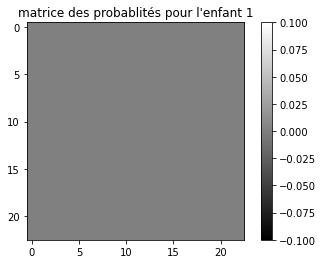

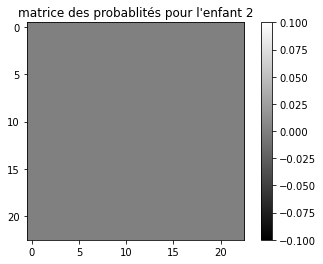

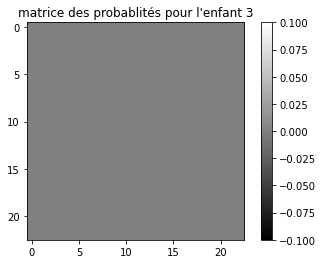

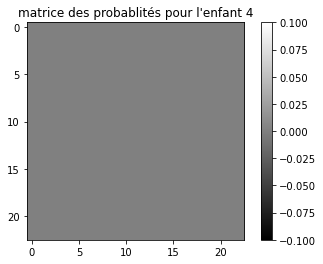

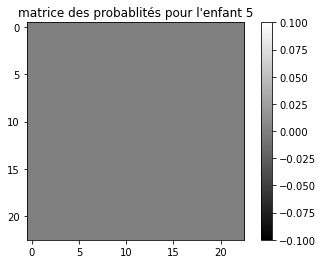

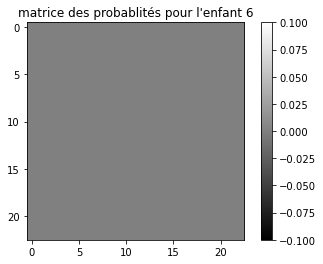

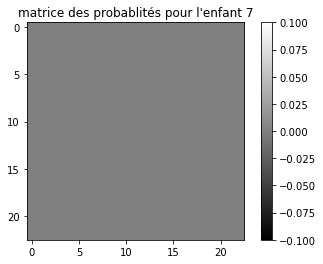

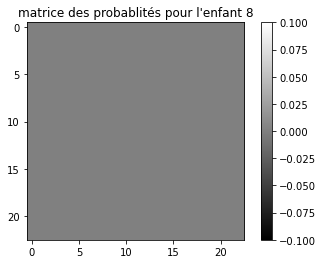

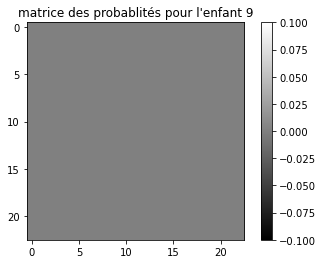

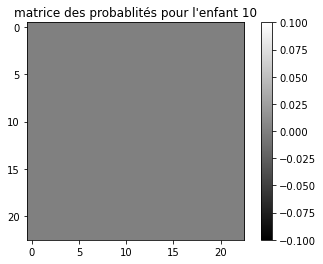

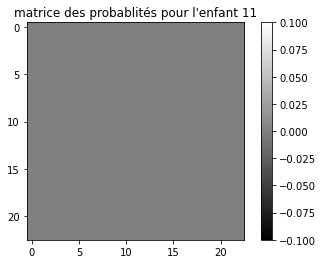

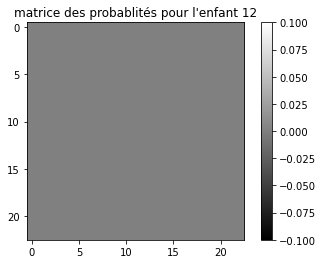

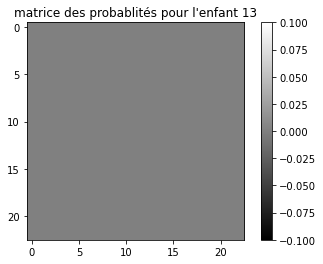

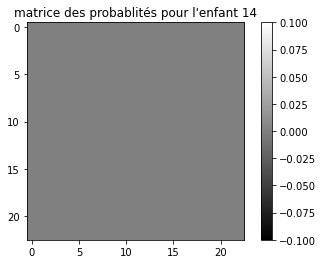

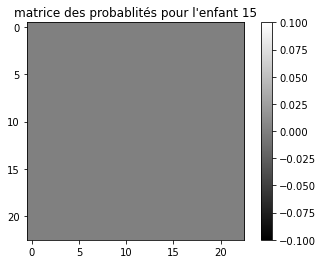

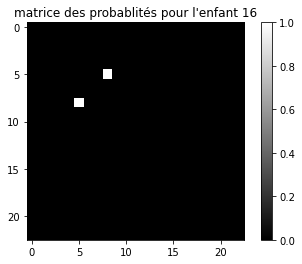

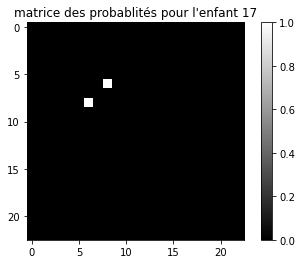

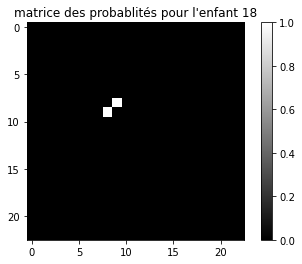

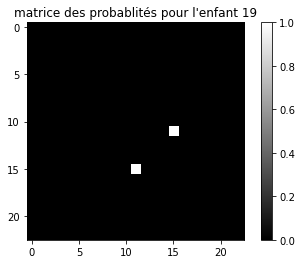

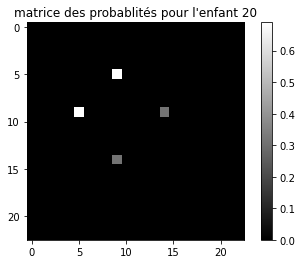

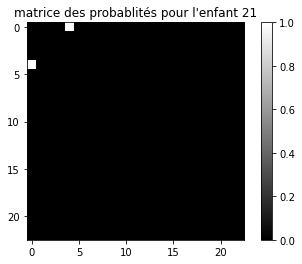

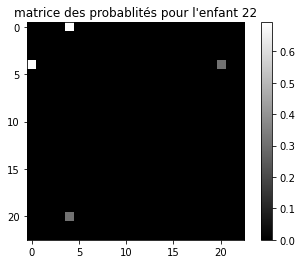

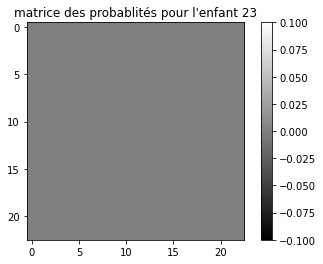

In [16]:
def Matrix_Proba(E):
    Matrix = np.zeros((n,n)) #initialise la matrice des probas
    for i in range(n):
        for j in range(i,n):
            Matrix[i,j] = Proba_Par_Enf(i+1,j+1,E) #i+1 et j+1 car on est avec python
            Matrix[j,i] = Matrix[i,j]
            #Donne la probabilité de donner E grâce aux parents i+1 et j+1
    if Matrix.sum() == 0:
        return Matrix
    else:
        return Matrix/(Matrix.sum()/2) 
        # Nous faisons ceci pour normaliser les probabilités et avoir une probabilité de 1
        #s'il y en a qu'une qui est non nulle 
for i in range(n):            
    plt.imshow(Matrix_Proba(i+1),cmap='gray')
    plt.colorbar()
    plt.title(f"matrice des probablités pour l'enfant {i+1}")
    plt.show()

In [17]:
#Retrouver les indices des parents qui sont les plus probables

def Recup_Parents_max(E): #E est un enfant
    M = Matrix_Proba(E) #Matrice des probas
    P1,P2 = np.unravel_index(np.argmax(M),M.shape)
    # np.argmax(M) --> donne l'argmax de la matrice applatie
    #np.unravel_index(np.argmax(M),M.shape) --> récupère l'indice (i,j)
    if M.max() == 0 :
        pass
    else:
        return [E,P1+1,P2+1,-np.log(M.max())] # /!\ P1+1 et P2+1 

Liste_pedigree = [] 
for e in range(gen,n+1):
    Liste_pedigree.append(Recup_Parents_max(e)) #ra
    Liste_pedigree = [x for x in Liste_pedigree if isinstance(x, list)] 
    # permet de tester si les elts sont du type list et non du type None

Liste_pedigree

[[16, 6, 9, -0.0],
 [17, 7, 9, -0.0],
 [18, 9, 10, -0.0],
 [19, 12, 16, -0.0],
 [20, 6, 10, 0.3715635564324831],
 [21, 1, 5, -0.0],
 [22, 1, 5, 0.3677247801253174]]

In [19]:
# Créez un graphe non orienté vide
g = ig.Graph(directed = True)

# Spécifiez un nom pour chaque nœud
node_names = [f'{i+1}' for i in range(n) ]

# Ajoutez n noeuds à l'arbre
g.add_vertices(len(node_names)) 


# Ajoutez des arêtes pour connecter les noeuds et former un arbre
for i in range(len(Liste_pedigree)):
    E,P1,P2 = Liste_pedigree[i][0]-1, Liste_pedigree[i][1]-1,Liste_pedigree[i][2] -1
    # /!\ Avec Python on commence à compter à 0 E,P1 et P2 sont des indices
      # Définissez les options de l'arête, par exemple, la couleur
        
    edge_options = {
            "color": "blue",     # Couleur de l'arête (par exemple, "blue", "red", "green")
            "width": 0.6,          # Largeur de l'arête
            "arrow_size": 0.8,    # Taille de la flèche de l'arête (pour les graphes dirigés)
            "label": round(np.exp(-Liste_pedigree[i][3]),2),    # Étiquette de l'arête
            "label_color": "#006400",  # Couleur de l'étiquette
            "label_dist": 0.4,   # Distance de l'étiquette par rapport à l'arête
            "label_font_size": 8,  # Taille de la police de l'étiquette
            "curve": 1,      # Courbure de l'arête (pour les graphes dirigés)
            }
    g.add_edges([(P1, E),(P2,E)],edge_options) 
    # Par exemple, pour créer deux branche avec les flèches qui vont bien 
    

# Pédigré avec le jeu de données sur les tétraploïdes avec dosage

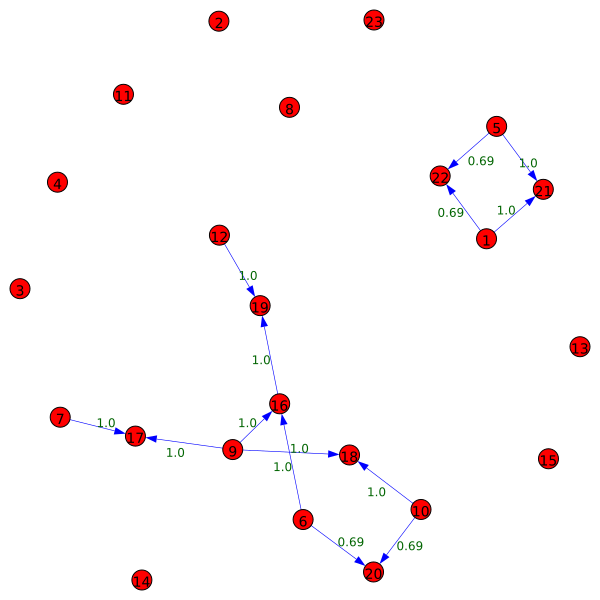

In [20]:
ig.plot(g,vertex_label=node_names)#, bbox=(350,500))